## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Она очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[0.43547202, 0.25067716, 0.07676443],
       [0.91671924, 0.02492242, 0.68206737],
       [0.87133229, 0.69982079, 0.62026385],
       [0.59014381, 0.60826164, 0.25668494],
       [0.61691525, 0.56405261, 0.76158243]])

In [3]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [4]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.43547202 5.25067716 5.07676443]
 [5.91671924 5.02492242 5.68206737]
 [5.87133229 5.69982079 5.62026385]
 [5.59014381 5.60826164 5.25668494]
 [5.61691525 5.56405261 5.76158243]]



In [5]:
print("X*X^T  :\n%s\n" % np.dot(a, a.T))

X*X^T  :
[[0.25836769 0.45781157 0.60248412 0.42917269 0.46850688]
 [0.45781157 1.3062112  1.23927004 0.73123197 1.09904617]
 [0.60248412 1.23927004 1.63369634 1.09909789 1.40465597]
 [0.42917269 0.73123197 1.09909789 0.7841391  0.90264703]
 [0.46850688 1.09904617 1.40465597 0.90264703 1.27874757]]



In [6]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=-1)))

Среднее по колонкам :
[0.25430454 0.54123635 0.73047231 0.48503013 0.64751676]



In [7]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [8]:
x = torch.randn(5, 3)
x

tensor([[ 0.4042, -0.7442, -0.4115],
        [-0.9957, -1.1253, -0.5337],
        [-1.2535, -0.2236, -1.4824],
        [-0.3188,  2.3125, -0.2023],
        [-1.4672, -0.3602,  0.2500]])

In [9]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [10]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[5.4042, 4.2558, 4.5885],
        [4.0043, 3.8747, 4.4663],
        [3.7465, 4.7764, 3.5176],
        [4.6812, 7.3125, 4.7977],
        [3.5328, 4.6398, 5.2500]])



In [11]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

X*X^T  (1):
tensor([[ 0.8865,  0.6546,  0.2698, -1.7665, -0.4278],
        [ 0.6546,  2.5427,  2.2910, -2.1769,  1.7328],
        [ 0.2698,  2.2910,  3.8188,  0.1824,  1.5491],
        [-1.7665, -2.1769,  0.1824,  5.4901, -0.4157],
        [-0.4278,  1.7328,  1.5491, -0.4157,  2.3449]])

X*X^T  (2):
tensor([[ 0.8865,  0.6546,  0.2698, -1.7665, -0.4278],
        [ 0.6546,  2.5427,  2.2910, -2.1769,  1.7328],
        [ 0.2698,  2.2910,  3.8188,  0.1824,  1.5491],
        [-1.7665, -2.1769,  0.1824,  5.4901, -0.4157],
        [-0.4278,  1.7328,  1.5491, -0.4157,  2.3449]])



In [12]:
x @ x.T

tensor([[ 0.8865,  0.6546,  0.2698, -1.7665, -0.4278],
        [ 0.6546,  2.5427,  2.2910, -2.1769,  1.7328],
        [ 0.2698,  2.2910,  3.8188,  0.1824,  1.5491],
        [-1.7665, -2.1769,  0.1824,  5.4901, -0.4157],
        [-0.4278,  1.7328,  1.5491, -0.4157,  2.3449]])

In [13]:
x_np = x.numpy()

In [14]:
x_np @ x_np.T

array([[ 0.8864644 ,  0.65463156,  0.26977095, -1.766473  , -0.42784384],
       [ 0.65463156,  2.5427148 ,  2.2910159 , -2.1769195 ,  1.7327929 ],
       [ 0.26977095,  2.2910159 ,  3.818814  ,  0.18237858,  1.5491054 ],
       [-1.766473  , -2.1769195 ,  0.18237858,  5.490118  , -0.4157358 ],
       [-0.42784384,  1.7327929 ,  1.5491054 , -0.4157358 ,  2.3449004 ]],
      dtype=float32)

In [15]:
np.dot(x_np, x_np.T)

array([[ 0.8864644 ,  0.65463156,  0.26977095, -1.766473  , -0.42784384],
       [ 0.65463156,  2.5427148 ,  2.2910159 , -2.1769195 ,  1.7327929 ],
       [ 0.26977095,  2.2910159 ,  3.818814  ,  0.18237858,  1.5491054 ],
       [-1.766473  , -2.1769195 ,  0.18237858,  5.490118  , -0.4157358 ],
       [-0.42784384,  1.7327929 ,  1.5491054 , -0.4157358 ,  2.3449004 ]],
      dtype=float32)

In [16]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([-0.2505, -0.8849, -0.9865,  0.5971, -0.5258])



In [17]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


### Создаем тензоры в pytorch и снова изучаем базовые операции

In [18]:
x = torch.empty(5, 3) # пустой тензор
print(x)

tensor([[-3.4600e+24,  3.0616e-41, -3.4626e+24],
        [ 3.0616e-41,  1.4013e-45,  0.0000e+00],
        [-4.3805e-01,  4.5604e-41,  0.0000e+00],
        [ 0.0000e+00, -4.4747e-01,  4.5604e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [19]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.0830, 0.8574, 0.6845],
        [0.6192, 0.2673, 0.1051],
        [0.4952, 0.7422, 0.7336],
        [0.3986, 0.5881, 0.5592],
        [0.0372, 0.8822, 0.2125]])


In [20]:
x = torch.zeros(5, 3) # тензор с нулями
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [21]:
x = torch.zeros(5, 3, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [22]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [23]:
x = torch.tensor([5.5, 3], dtype=torch.long)
print(x)

tensor([5, 3])


<ipython-input-23-bba2d918af09>:1: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  x = torch.tensor([5.5, 3], dtype=torch.long)


In [24]:
x = x.new_ones(5, 3, dtype=torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [25]:
x = torch.randn_like(x, dtype=torch.float) # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[ 2.0187,  1.1220, -1.5969],
        [-0.9963,  0.5478, -0.6458],
        [-1.0995,  0.1742,  0.2299],
        [ 0.5523, -0.7144,  0.9392],
        [-0.3414, -0.6123,  0.5287]]) torch.Size([5, 3])


In [26]:
y = torch.rand(5, 3)
print(x + y) # операция сложение

tensor([[ 2.1494,  1.6164, -0.6662],
        [-0.4157,  1.0726, -0.0586],
        [-0.5877,  0.2261,  1.0056],
        [ 1.4909,  0.0986,  1.1746],
        [-0.3048, -0.3964,  1.2502]])


In [27]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[ 2.1494,  1.6164, -0.6662],
        [-0.4157,  1.0726, -0.0586],
        [-0.5877,  0.2261,  1.0056],
        [ 1.4909,  0.0986,  1.1746],
        [-0.3048, -0.3964,  1.2502]])


In [28]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[ 2.1494,  1.6164, -0.6662],
        [-0.4157,  1.0726, -0.0586],
        [-0.5877,  0.2261,  1.0056],
        [ 1.4909,  0.0986,  1.1746],
        [-0.3048, -0.3964,  1.2502]])


In [29]:
print(x * y) # поэлементное умножение

tensor([[ 0.2638,  0.5547, -1.4863],
        [-0.5785,  0.2875, -0.3793],
        [-0.5627,  0.0090,  0.1783],
        [ 0.5184, -0.5807,  0.2210],
        [-0.0125, -0.1322,  0.3815]])


In [30]:
print(x @ y.t()) # матричное умножение

tensor([[-0.6677,  0.8231, -0.1474,  2.4311, -0.8362],
        [-0.4605, -0.6703, -0.9825, -0.6418, -0.3842],
        [ 0.1564, -0.4120, -0.3754, -0.8363,  0.1632],
        [ 0.5932,  0.4974,  0.9742,  0.1586,  0.5437],
        [ 0.1447, -0.2091,  0.2036, -0.6938,  0.2368]])


In [31]:
print(x.mm(y.t())) # и опять матричное умножение

tensor([[-0.6677,  0.8231, -0.1474,  2.4311, -0.8362],
        [-0.4605, -0.6703, -0.9825, -0.6418, -0.3842],
        [ 0.1564, -0.4120, -0.3754, -0.8363,  0.1632],
        [ 0.5932,  0.4974,  0.9742,  0.1586,  0.5437],
        [ 0.1447, -0.2091,  0.2036, -0.6938,  0.2368]])


In [32]:
x

tensor([[ 2.0187,  1.1220, -1.5969],
        [-0.9963,  0.5478, -0.6458],
        [-1.0995,  0.1742,  0.2299],
        [ 0.5523, -0.7144,  0.9392],
        [-0.3414, -0.6123,  0.5287]])

In [33]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга 
print(x.unsqueeze(1).shape) 

torch.Size([1, 5, 3])
torch.Size([5, 1, 3])


In [34]:
x.unsqueeze(0)

tensor([[[ 2.0187,  1.1220, -1.5969],
         [-0.9963,  0.5478, -0.6458],
         [-1.0995,  0.1742,  0.2299],
         [ 0.5523, -0.7144,  0.9392],
         [-0.3414, -0.6123,  0.5287]]])

In [35]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга 

torch.Size([5, 3])


In [36]:
x = torch.rand(3, 16, 16)

In [37]:
x.shape

torch.Size([3, 16, 16])

In [38]:
x = x.permute(1, 2, 0)
x.shape

torch.Size([16, 16, 3])

Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [39]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### Работаем с градиентами руками

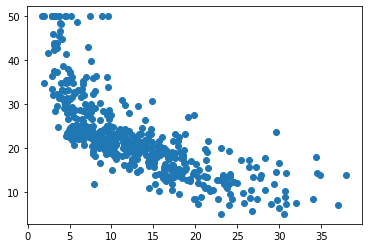

In [40]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

<img src="./image.png">

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [41]:
w = torch.tensor([3.], requires_grad=True)
b = torch.tensor([1.], requires_grad=True)

x = torch.tensor([8], dtype=torch.float32)

assert w.grad is None
assert b.grad is None

In [42]:
y_pred = (w * w) * x + b # и опять совершаем операции с тензорами
loss = y_pred.mean()
loss.backward()

In [43]:
loss

tensor(73., grad_fn=<MeanBackward0>)

In [44]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([48.])
dL/db = 
 tensor([1.])


In [45]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

In [46]:
y_pred = w * x + b # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами
loss.backward() # считаем градиенты

In [47]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.7506])
dL/db = 
 tensor([-42.9860])


In [48]:
from IPython.display import clear_output

for i in range(400):

    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad.data 
    b.data -= 0.05 * b.grad.data

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


loss =  43.648193


### Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения

#### Как формировать батчи и пихать их в сетку

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса должно быть два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [49]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    x.shape = (N, d), where N = number of examples, and d = number of features
    y.shape = (N, )
    """
    
    def __init__(self, x, y):
        
        self.x=x
        self.y=y
    
    def __getitem__(self, idx):
        """
        Эта функция должна возвращать словарь с одним элементом из выборки и ответом
        Не забудьте преобразовать пример в формат тензора
        """

        return {'sample': YOUR_CODE_HERE, 'target': YOUR_CODE_HERE}
    
    def __len__(self):
        return len(self.x)

In [50]:
x = np.random.rand(1000, 5).astype(np.float32)
y = np.random.rand(1000).astype(np.float32)

In [51]:
x.dtype

dtype('float32')

In [52]:
our_dataset = RandomDataset(x, y)

In [53]:
our_dataset.__getitem__(1)

{'sample': array([0.5936322 , 0.82211804, 0.3819273 , 0.18373182, 0.5950086 ],
       dtype=float32),
 'target': 0.6409133}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [54]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [55]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.9264, 0.2811, 0.1027, 0.0360, 0.5029],
        [0.5936, 0.8221, 0.3819, 0.1837, 0.5950],
        [0.3815, 0.6740, 0.1728, 0.8345, 0.0399],
        [0.1810, 0.1140, 0.3926, 0.5055, 0.1348]])
Target: tensor([0.1869, 0.6409, 0.0366, 0.4694])


#### Как сделать сетку

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [56]:
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.linear1 = nn.Linear(5, 3)
        self.linear2 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [57]:
model = SimpleModel()

In [58]:
y_pred = model(batch_x) # получили предсказания модели

In [59]:
y_pred

tensor([[0.3336],
        [0.2548],
        [0.2693],
        [0.2450]], grad_fn=<AddmmBackward>)

#### Как написать цикл обучения
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [60]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки
mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

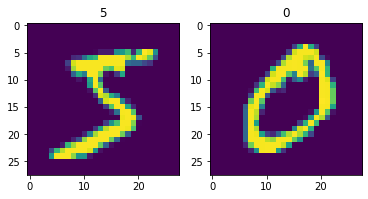

In [61]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [62]:
model = nn.Sequential(
    nn.Flatten(), # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(), # функция активации релу
    nn.Linear(128, 10), # функция активации релу
    nn.Softmax(dim=-1) # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели

Веса моделей хранятся в виде матриц и выглядят так:

In [63]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[-0.0342,  0.0315,  0.0351,  ..., -0.0178,  0.0031,  0.0174],
          [ 0.0185, -0.0255, -0.0087,  ...,  0.0033,  0.0165, -0.0205],
          [-0.0017,  0.0198, -0.0043,  ..., -0.0048,  0.0124,  0.0020],
          ...,
          [ 0.0280,  0.0332,  0.0248,  ..., -0.0194,  0.0159,  0.0084],
          [ 0.0203, -0.0010, -0.0034,  ..., -0.0341,  0.0254, -0.0226],
          [-0.0205,  0.0013,  0.0307,  ..., -0.0103, -0.0052, -0.0130]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0068,  0.0318, -0.0216, -0.0257, -0.0228, -0.0179,  0.0342, -0.0175,
          -0.0282, -0.0061, -0.0018,  0.0310,  0.0270, -0.0268, -0.0356, -0.0194,
          -0.0342,  0.0071, -0.0350, -0.0110,  0.0142, -0.0204, -0.0074,  0.0105,
           0.0236, -0.0011,  0.0230, -0.0044,  0.0291,  0.0308,  0.0064, -0.0175,
           0.0320, -0.0305, -0.0131, -0.0238,  0.0310, -0.0154, -0.0268, -0.0137,
          -0.0221, -0.0306, -0.0342, 

In [64]:
if torch.cuda.is_available():
    model = model.cuda()

In [68]:
epoch = 0
for epoch in range(0, 3): # всего у нас будет 3 эпохи (3 раза пройдемся по всем батчам из датасета)
    for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
        if torch.cuda.is_available():
            x_train, y_train = x_train.cuda(), y_train.cuda()
        y_pred = model(x_train) # делаем предсказания
        loss = nn.CrossEntropyLoss()(y_pred, y_train) # считаем лосс
        loss.backward() # считаем градиенты обратным проходом
        optimizer.step() # обновляем параметры сети
        optimizer.zero_grad() # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        mean_val_loss = [] # сюда будем складывать средний лосс по батчам
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader): # берем батч из вал лоадера
                if torch.cuda.is_available():
                    x_val, y_val = x_val.cuda(), y_val.cuda()
                y_pred = model(x_val) # делаем предсказания
                loss = nn.CrossEntropyLoss()(y_pred, y_val) # считаем лосс
                mean_val_loss.append(loss.cpu().detach().numpy()) # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).cpu().detach().numpy().tolist())
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(mean_val_loss), accuracy=np.mean(val_accuracy)
        )) # выводим статистику
    

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 1.4923174381256104, accuracy: 0.9707


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 1.4922422170639038, accuracy: 0.9707


### Дополнительные материалы:

* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)